### Dataset 

In [1]:
# dataset: SMS.txt
# Location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
import string
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,log_loss
from nltk import pos_tag

In [3]:
data = pd.read_csv("SMSSpamCollection",sep = '\t',header = None,names = ['label','text'])
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


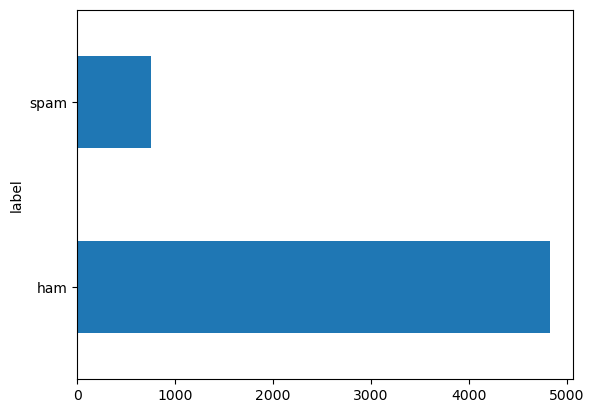

In [4]:
data.label.value_counts().plot(kind = 'barh');

<Axes: xlabel='count', ylabel='label'>

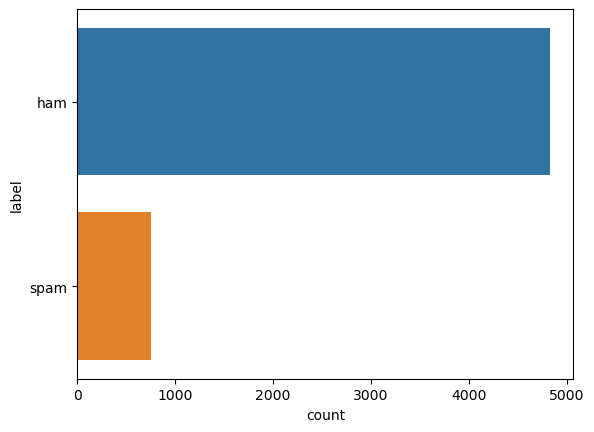

In [5]:
sns.countplot(y=data['label'])

In [6]:
swords=stopwords.words('english')

In [7]:
text = ",".join(data['text'].to_list())


In [8]:
word_tokenize(text)

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...',
 ',',
 'Ok',
 'lar',
 '...',
 'Joking',
 'wif',
 'u',
 'oni',
 '...',
 ',',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 '.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 ',',
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'U',
 'c',
 'already',
 'then',
 'say',
 '...',
 ',',
 'Nah',
 'I',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'around',
 'here',
 'though',
 ',',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like

In [9]:
ls = LancasterStemmer()
wnl = WordNetLemmatizer()

In [10]:
def clean_text(text):
    token1 = word_tokenize(text)
    token2 = [word.lower() for word in token1 if word not in string.punctuation]
    token3 = [word for word in token2 if word.lower() not in swords]
    token4 =[]
    tags = pos_tag(token3)
    for word in tags:
        if word[1].startswith('N'):
            token4.append(wnl.lemmatize(word[0],pos = 'n'))
        if word[1].startswith('V'):
            token4.append(wnl.lemmatize(word[0],pos = 'v'))
        if word[1].startswith('R'):
            token4.append(wnl.lemmatize(word[0],pos = 'r'))
        if word[1].startswith('J'):
            token4.append(wnl.lemmatize(word[0],pos = 'a'))
    return token4

In [11]:
text1 = clean_text(text)

In [12]:
text1

['go',
 'jurong',
 'point',
 'crazy',
 '..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'get',
 'amore',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 "n't",
 'think',
 'go',
 'usf',
 'life',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 '£1.50',
 'rcv',
 'even',
 'brother',
 'speak',
 'treat',
 'aid',
 'patent.',
 'request',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 'copy',
 'friend',
 'callertune',
 'winner',
 'value',
 'network',
 'customer',
 'select',
 'receivea',
 '£900',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',


In [13]:
freq = FreqDist(text1)

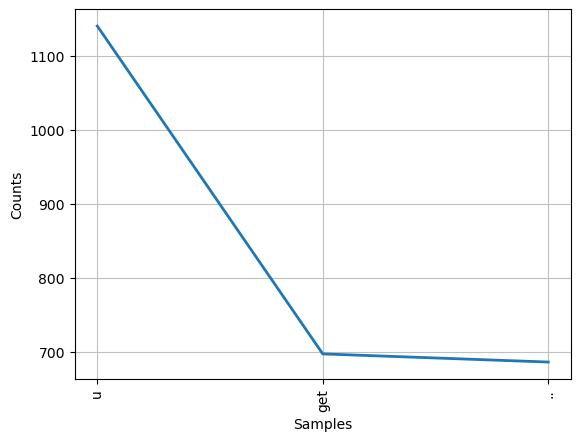

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
freq.plot(3)

In [15]:
data['text'].apply(lambda x: clean_text(x))

0       [go, jurong, point, crazy, .., available, bugi...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4                        [nah, n't, think, go, usf, life]
                              ...                        
5567    [time, try, contact, u., u, £750, pound, prize...
5568                      [ü, b, go, esplanade, fr, home]
5569                             [pity, mood, suggestion]
5570    [guy, bitch, act, interested, buying, somethin...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

### TF*IDF Vecotrizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [18]:
X_vect = tfidf.fit_transform(data['text'])

In [19]:
tfidf.get_feature_names_out()

array(["'anything", "'comfort", "'d", ..., '…thanks', '〨ud', '鈥┾'],
      dtype=object)

In [20]:
X = X_vect
y = data['label']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y,test_size=0.25)

In [23]:
X_train.shape

(4179, 7300)

In [24]:
X_test.shape

(1393, 7300)

## Build A Model

In [25]:
classifier  = SVC(kernel = 'linear')

In [26]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.9734386216798278

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.98      0.82      0.89       187

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [30]:
df = pd.read_csv('sample.csv',header = None,sep="\t")
df.head()

,0
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [31]:
classifier.predict(tfidf.transform(df[0]))

array(['ham', 'spam', 'ham'], dtype=object)